In [70]:
from extendedmodel import mixed_tracing,next_generation_tracing, first_generation_tracing
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.lines import Line2D
color =  dict(mcolors.TABLEAU_COLORS, **mcolors.CSS4_COLORS)
colors = [i for i in color.keys()]

In [71]:
N = 10000
parameter = {
            'R0': 2.5,
            'q': 0.3,
            'app_participation': 0.3,
            'chi':1/2.5,
            'recovery_rate' : 1/6,
            'alpha' : 1/2,
            'beta' : 1/2,
            'number_of_contacts' : 6.3,
            'x':0.4,
            'y':0.1,
            'z':0.64,
            'I_0' : 1000,
            'omega':1/10
            }
t = np.linspace(0,365,365)
model = mixed_tracing(N, True)
model1 = first_generation_tracing(N, True)
model2 = next_generation_tracing(N, True)


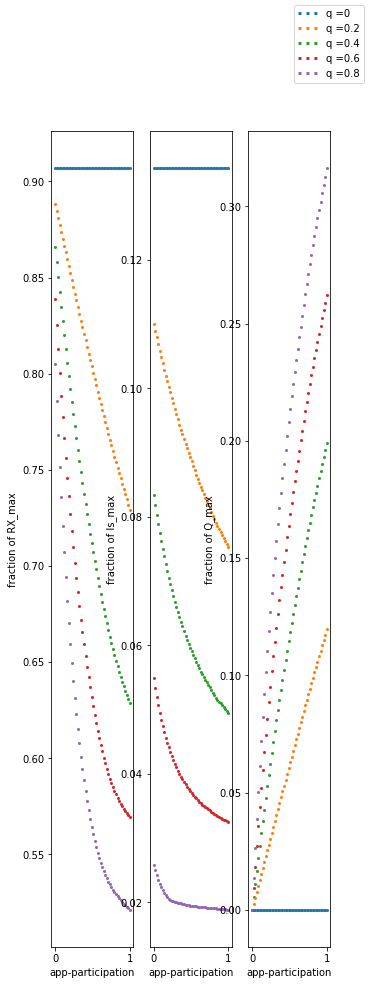

In [76]:
fig, axs = plt.subplots(1,3,figsize=(5, 15))
a = np.linspace(0,1,50)
q = [0,0.2,0.4,0.6,0.8]
for i in a:
    for j in q:   
        parameter.update({'app_participation':i})
        parameter.update({'q':j})   
        model.set_parameters(parameter)
        result = model.compute(t)
        axs[0].plot(i,(result['R'].max(axis=0)+result['X'].max(axis=0))/N,'.',color=colors[q.index(j)])
        axs[1].plot(i,(result['I_S'].max(axis=0))/N,'.',color=colors[q.index(j)])
        axs[2].plot(i,(result['Q'].max(axis=0))/N,'.',color=colors[q.index(j)])        
axs[0].set_ylabel('fraction of RX_max')        
axs[1].set_ylabel('fraction of Is_max')        
axs[2].set_ylabel('fraction of Q_max') 
axs[0].set_xlabel('app-participation')
axs[1].set_xlabel('app-participation')
axs[2].set_xlabel('app-participation')
lines = [Line2D([0], [0], color=colors[x], linewidth=3, linestyle='dotted') for x in range(len(q))]
labels = [('q =' + str(j)) for j in q]
fig.legend(lines, labels)

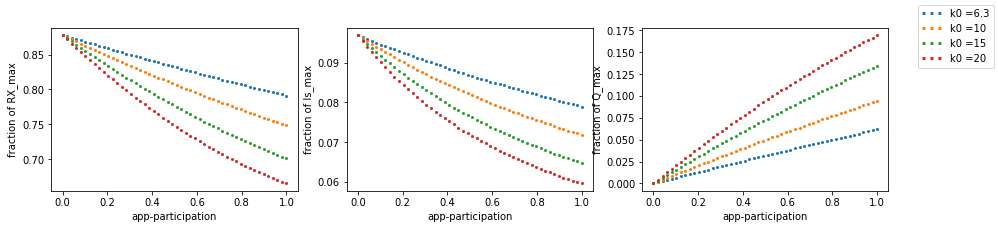

In [64]:
fig, axs = plt.subplots(1,3,figsize=(15, 3))
a = np.linspace(0,1,50)
k0 = [6.3,10,15,20]
for i in a:
    for j in k0:
        parameter.update({'app_participation':i})
        parameter.update({'number_of_contacts':j})   
        model.set_parameters(parameter)
        result = model.compute(t)
        axs[0].plot(i,(result['R'].max(axis=0)+result['X'].max(axis=0))/N,'.',color=colors[k0.index(j)])
        axs[1].plot(i,(result['I_S'].max(axis=0))/N,'.',color=colors[k0.index(j)])
        axs[2].plot(i,(result['Q'].max(axis=0))/N,'.',color=colors[k0.index(j)])
axs[0].set_ylabel('fraction of RX_max')        
axs[0].set_xlabel('app-participation')
axs[1].set_ylabel('fraction of Is_max')      
axs[1].set_xlabel('app-participation')
axs[2].set_ylabel('fraction of Q_max')      
axs[2].set_xlabel('app-participation')
lines = [Line2D([0], [0], color=colors[x], linewidth=3, linestyle='dotted') for x in range(len(k0))]
labels = [('k0 =' + str(j)) for j in k0]
fig.legend(lines, labels)